In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, LineString
from mpc_phy import mpc_phy
import warnings
import util_fcns as uf
from SAGE_input_handler import SAGE_input_handler

warnings.filterwarnings('ignore')

# Create the buildings (load them)

In [2]:
buildings_path = r"C:\Users\julia\OneDrive - UCL\Pièces jointes\MATLAB\building_lines_all_considered.mat"
list_omit_buildings = [1,2,3,10]
phy_mdl = mpc_phy(buildings_path, list_omit_buildings)

In [3]:
base_dir_gps_ms_files = "C:\\Users\\julia\\Documents\\TXCOORD\Mercator\\"
cycleRate = 30.2
BS = 'MKT'
route_name = 'StBarbe'
n_file = 0 # Indexing in python starts from 0

nCycles = phy_mdl.nCycles_gps_file_num_sys[BS][route_name][n_file]

gps_file_num = phy_mdl.ms_gps_file_num_sys[BS][route_name][n_file]
ms_file_path = uf.utility_get_gps_file_path(base_dir_gps_ms_files, gps_file_num)

ms = phy_mdl.get_ms_coordinates(ms_file_path, gps_file_num, BS, nCycles, cycleRate)

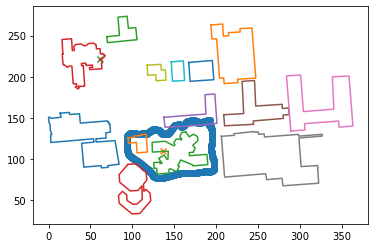

In [4]:
poly_build = phy_mdl.make_polygon_buildings()
_, ax = phy_mdl.plot_buildings(poly_build)
ax.scatter(ms[:, 0], ms[:, 1], linewidths=0.1)
ax.scatter(phy_mdl.ms_center_traj_st_barbe['x'], phy_mdl.ms_center_traj_st_barbe['y'], marker='x')
ax.scatter(phy_mdl.bs[BS]['x'], phy_mdl.bs[BS]['y'], marker='x')
plt.show()


In [5]:
mpc_powers_path = r'C:\Users\julia\OneDrive - UCL\Pièces jointes\MATLAB\ISIS RESULTS\ISIS_MKT_ALL_FILE_27_WAVES_27_ALPHA.txt'
mpc_params_path = r'C:\Users\julia\OneDrive - UCL\Pièces jointes\MATLAB\ISIS RESULTS\ISIS_MKT_ALL_FILE_27_WAVES_27_PARAM.txt'

max_num_paths = 27

sage_handler = SAGE_input_handler(mpc_params_path, mpc_powers_path, max_num_paths)
pg = sage_handler.power_definition(power_combination='2-pol-comp')

aoa_ref = phy_mdl.set_aoa_reference(BS)
aod_ref = phy_mdl.set_aod_reference(ms, BS)
aod_ref = np.delete(aod_ref, sage_handler.idx_empty_ts, 0)
sage_handler.angular_correction_UCA(pg, aod_ref, aoa_ref)

In [12]:
phy_mdl.build_mpc_path_points(sage_handler.aoa, sage_handler.aod, ms, 1, poly_build[4])

LINESTRING (190.0856955101481 144.5128118665889, 286.3871548724522 117.5678879533453) [(190.08569551014807, 144.5128118665889), (195.5976224829159, 142.97058754434025)]


In [80]:
t = 2300
p = 6
tmp = ms[t, :] + 100*np.column_stack((np.cos(sage_handler.aod[t]), np.sin(sage_handler.aod[t])))
print(tmp.shape)
line_1 = geometry.LineString([(ms[t, :]), (tmp[p,:])])
print(line_1)

(9, 2)
LINESTRING (106.9912955071409 130.5638632580001, 163.9609382419412 48.3783425948734)


In [81]:
idx_b, inters = zip(*[[idx, line_1.intersection(b).coords[:]] for idx, b in enumerate(poly_build) if line_1.intersection(b)])
print(idx_b[0])
print(inters)

1
([(108.306371095836, 128.66670949715598), (117.5657598339749, 115.30893423413185)], [(130.7563742319345, 96.27989595826726), (140.05223643680876, 82.869503358884)])


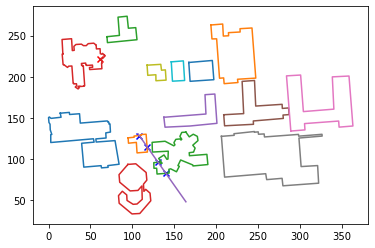

In [82]:
poly_build = phy_mdl.make_polygon_buildings()
_, ax = phy_mdl.plot_buildings(poly_build)
ax.plot([line_1.coords[:][0][0], line_1.coords[:][1][0]], [line_1.coords[:][0][1], line_1.coords[:][1][1]])
ax.scatter(phy_mdl.bs[BS]['x'], phy_mdl.bs[BS]['y'], marker='x', color='r')

for all_inters_all_builds in inters:
    for all_inters_this_build in all_inters_all_builds:
        ax.scatter(all_inters_this_build[0],all_inters_this_build[1], marker='x',color='b')

plt.show()



In [35]:
from shapely.strtree import STRtree
tree = STRtree(poly_build)
index_by_id = dict((id(pt), i) for i, pt in enumerate(poly_build))
query_geom = line_1

a = [(index_by_id[id(pt)], pt.wkt) for pt in tree.query(query_geom)]
print(a[0][1].exterior.coords)

AttributeError: 'str' object has no attribute 'exterior'

In [21]:
from shapely import geometry

polygon = [(4.0, -2.0), (5.0, -2.0), (4.0, -3.0), (3.0, -3.0), (4.0, -2.0)]
shapely_poly = geometry.Polygon(polygon)

line = [(4.0, -2.0000000000000004), (2.0, -1.1102230246251565e-15)]
shapely_line = geometry.LineString(line)

intersection_line = list(shapely_poly.intersection(shapely_line).coords)
print(intersection_line)

[(4.0, -2.0000000000000004)]
